In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data_cleaned_2021.csv')

In [3]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

we start from job title and then for many of the important variables we group their values into 3-4 groups with recognizable names, so then we can perform EDA and understand what we see, but also to lessen our dummies in the regression afterwords, so that data are more compact

In [5]:
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [6]:
data_sc=['data scientist']
data_eng=['data engineer','data modeler','machine learning engineer']
data_analyst=['analyst','data analitics']
manager=['Data scientist project manager','director']
na=['na']

In [7]:
def Getjob(job):
    if job in data_sc:
        return "data_scientist"
    elif job in data_eng:
        return "data_engineer"
    elif job in data_analyst:
        return "data_analyst"
    else:
        return "unkown"

In [8]:
df['job_title'] = df['job_title_sim'].apply(lambda x: Getjob(x))

In [9]:
df['Sector'].value_counts()

Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
-1                                     10
Non-Profit                              9
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry            

In [10]:
df['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [11]:
sector_miscel=[ 'Retail', 'Education'
       'Media', 'Transportation & Logistics',
       'Telecommunications', '-1',  'Mining & Metals',
       'Government',  'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 
       'Consumer Services']
sector_fin=['Finance','Insurance','Business Services','Accounting & Legal']
sector_health=['Health Care','Biotech & Pharmaceuticals']
sector_it=['Information Technology']
sector_man=['Aerospace & Defense','Manufacturing']

In [12]:
def Getsector(sector):
    if sector in sector_fin:
        return "finance"
    elif sector in sector_health:
        return "health"
    elif sector in sector_man:
        return "aerospace_def_manufact"
    else:
        return "misceleneaous"

In [13]:
df['sector'] = df['Sector'].apply(lambda x: Getsector(x))

In [14]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [15]:
rev_unknown=['Unknown / Non-Applicable']
rev_less25m=['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)','$10 to $25 million (USD']
rev_upto_1b=['$25 to $50 million (USD)','$50 to $100 million (USD','$100 to $500 million (USD)','$500 million to $1 billion (USD)']
rev_higher_1b=['$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)']

In [16]:
def Getrevenue(revenue):
    if revenue in rev_less25m:
        return "<25m"
    elif revenue in rev_upto_1b:
        return "1b>r>25m"
    elif revenue in rev_higher_1b:
        return ">1b"
    else:
        return "unknown"

In [17]:
df['revenue'] = df['Revenue'].apply(lambda x: Getrevenue(x))

In [18]:
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [19]:
private_co=['Company - Private','Subsidiary or Business Segment','']
public_co=['Company - Public','Government']
other_co=['Nonprofit Organization','College / University','Other Organization','Hospital','School / School District']

In [20]:
def Gettype(type):
    if type in private_co:
        return "private"
    elif type in public_co:
        return "public"
    else:
        return "other"

In [21]:
df['type'] = df['Type of ownership'].apply(lambda x: Gettype(x))

In [22]:
df['Size'].value_counts()

1001 - 5000      150
501 - 1000       134
10000+           130
201 - 500        117
51 - 200          94
5001 - 10000      76
1 - 50            31
unknown           10
Name: Size, dtype: int64

In [23]:
df['Size'].unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 ', 'unknown'], dtype=object)

In [24]:
size_small=['1 - 50 ','51 - 200 ' ]
size_med=['201 - 500 ', '501 - 1000 ']
size_big=['1001 - 5000 ','5001 - 10000 ','10000+ ']
size_un=['unknown']

In [25]:
def Getsize(size):
    if size in size_small:
        return "small"
    elif size in size_med:
        return "medium"
    elif size in size_big:
        return "big"
    else:
        return "unknown"

In [26]:
df['size'] = df['Size'].apply(lambda x: Getsize(x))

In [27]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree', 'job_title', 'sector',
       'revenue', 'type', 'size'],
      dtype='object')

Then we unite columns that refer to skills that a data person knows, to groups that usually are used by data scientist, analyst or big data person

In [28]:
df['data_science']=df['Python']+df['aws']+df['keras']+df['pytorch']+df['scikit']+df['tensor']

In [29]:
df['data_analysis']=df['excel']+df['sql']+df['tableau']+df['google_an']+df['bi']+df['sas']

In [30]:
df['big_data']=df['hadoop']+df['spark']+df['mongo']+df['flink']

After that we create also a new variable which represents the difference between upper and lower salary

In [31]:
df['salary_diff']=df['Upper Salary']-df['Lower Salary']

In [32]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree', 'job_title', 'sector',
       'revenue', 'type', 'size', 'data_science', 'data_analysis', 'big_data',
       'salary_diff'],
      dtype='object')

In [33]:
df1=df[['Rating','Hourly','Employer provided','Age','Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'seniority_by_title', 'Degree', 'salary_diff',
        'data_analysis', 'job_title', 'sector',
       'revenue', 'type', 'size', 'data_science', 'big_data']]

In [34]:
df1.head()

,Rating,Hourly,Employer provided,Age,Lower Salary,Upper Salary,Avg Salary(K),seniority_by_title,Degree,salary_diff,data_analysis,job_title,sector,revenue,type,size,data_science,big_data
0,3.8,0,0,48,53,91,72.0,na,M,38,4,data_scientist,aerospace_def_manufact,unknown,private,medium,1,0
1,3.4,0,0,37,63,112,87.5,na,M,49,0,data_scientist,health,>1b,other,big,1,0
2,4.8,0,0,11,80,90,85.0,na,M,10,3,data_scientist,finance,1b>r>25m,private,medium,1,1
3,3.8,0,0,56,56,97,76.5,na,na,41,0,data_scientist,misceleneaous,1b>r>25m,public,big,1,0
4,2.9,0,0,23,86,143,114.5,na,na,57,3,data_scientist,finance,unknown,private,small,1,0


Then we have some basic visuals

In [35]:
import matplotlib as plt
import seaborn as sns

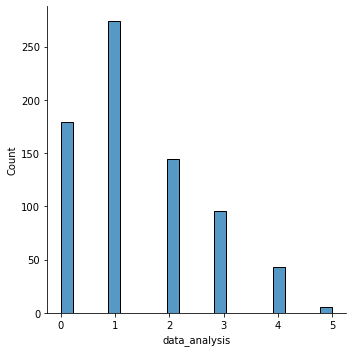

In [36]:
sns.displot(df['data_analysis']);

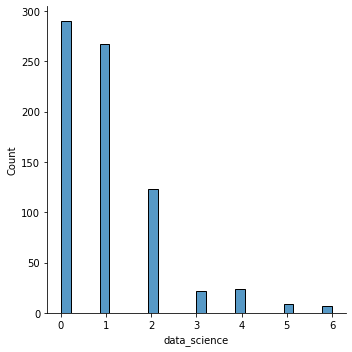

In [37]:
sns.displot(df['data_science']);

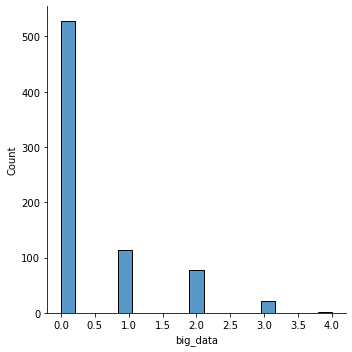

In [38]:
sns.displot(df['big_data']);

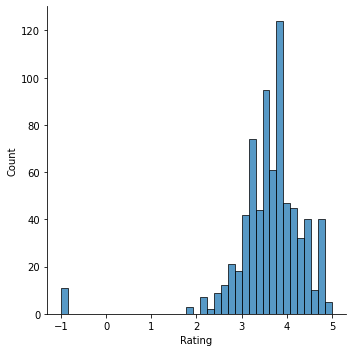

In [39]:
sns.displot(df['Rating']);

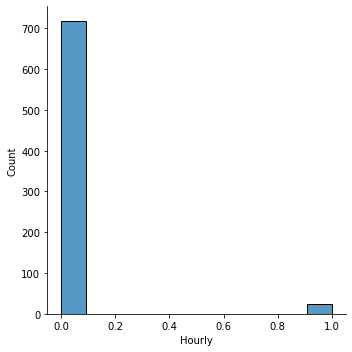

In [40]:
sns.displot(df['Hourly']);

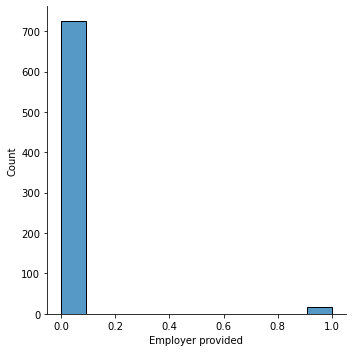

In [41]:
sns.displot(df['Employer provided']);

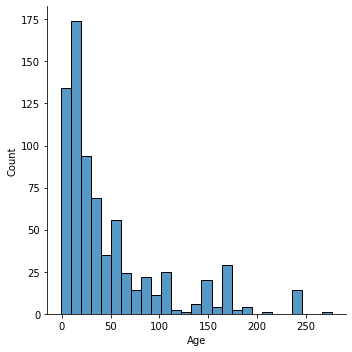

In [42]:
sns.displot(df['Age']);

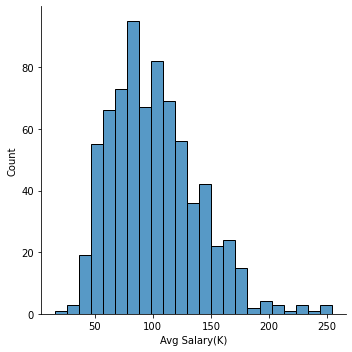

In [43]:
sns.displot(df['Avg Salary(K)']);

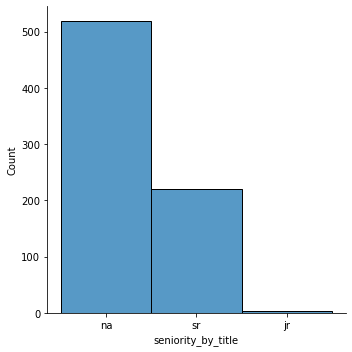

In [44]:
sns.displot(df['seniority_by_title']);

In [45]:
df1.groupby(['seniority_by_title'])['Avg Salary(K)'].mean()

seniority_by_title
jr     71.000000
na     93.095376
sr    121.690909
Name: Avg Salary(K), dtype: float64

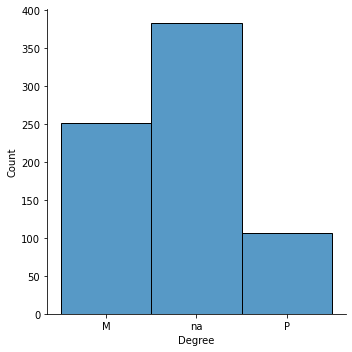

In [46]:
sns.displot(df['Degree']);

after that we analyse via groupby how salaries are distributed to our main job titles having in mind other variables too(degree,sector, type, etc)

In [47]:
df1.groupby(['Degree'])['Avg Salary(K)'].mean()

Degree
M     105.634921
P     115.981308
na     94.703655
Name: Avg Salary(K), dtype: float64

In [48]:
df1.groupby(['job_title','Degree'])['Avg Salary(K)'].mean()

job_title       Degree
data_analyst    M          63.450000
                na         67.443038
data_engineer   M         101.737500
                P         133.875000
                na        106.765957
data_scientist  M         117.847826
                P         129.578947
                na        115.613139
unkown          M          99.636364
                P         103.149123
                na         69.431507
Name: Avg Salary(K), dtype: float64

In [49]:
df1.groupby(['job_title'])['Avg Salary(K)'].mean()

job_title
data_analyst       66.344037
data_engineer     107.616438
data_scientist    118.293930
unkown             88.114943
Name: Avg Salary(K), dtype: float64

In [50]:
df1.groupby(['type'])['Avg Salary(K)'].mean()

type
other       77.466667
private    102.731982
public     109.213942
Name: Avg Salary(K), dtype: float64

In [51]:
df1.groupby(['type','job_title'])['Avg Salary(K)'].mean()

type     job_title     
other    data_analyst       59.964286
         data_engineer     108.600000
         data_scientist     91.558824
         unkown             66.977273
private  data_analyst       66.583333
         data_engineer     107.985000
         data_scientist    121.245946
         unkown             87.241379
public   data_analyst       69.478261
         data_engineer     105.951613
         data_scientist    117.468468
         unkown            111.511628
Name: Avg Salary(K), dtype: float64

In [52]:
df1.groupby(['size'])['Avg Salary(K)'].mean()

size
big        101.901685
medium      95.579681
small      110.108000
unknown    127.050000
Name: Avg Salary(K), dtype: float64

In [53]:
df1.groupby(['sector'])['Avg Salary(K)'].median()

sector
aerospace_def_manufact    96.0
finance                   96.5
health                    94.5
misceleneaous             98.5
Name: Avg Salary(K), dtype: float64

In [54]:
df1.groupby(['job_title','sector'])['Avg Salary(K)'].mean()

job_title       sector                
data_analyst    aerospace_def_manufact     60.500000
                finance                    65.764706
                health                     72.000000
                misceleneaous              66.588710
data_engineer   aerospace_def_manufact     96.000000
                finance                    94.443182
                health                    109.468750
                misceleneaous             115.362500
data_scientist  aerospace_def_manufact    106.657895
                finance                   118.771028
                health                    123.444444
                misceleneaous             117.859155
unkown          aerospace_def_manufact     84.589286
                finance                    79.916667
                health                     91.645161
                misceleneaous              86.982759
Name: Avg Salary(K), dtype: float64

In [55]:
df1.groupby(['revenue'])['Avg Salary(K)'].mean()

revenue
1b>r>25m     85.710106
<25m        121.966667
>1b         107.923554
unknown     104.296099
Name: Avg Salary(K), dtype: float64

In [56]:
df1.groupby(['job_title','revenue'])['Avg Salary(K)'].mean()

job_title       revenue 
data_analyst    1b>r>25m     61.423077
                >1b          67.058824
                unknown      71.000000
data_engineer   1b>r>25m     97.808824
                <25m         94.750000
                >1b         102.750000
                unknown     115.054054
data_scientist  1b>r>25m    101.629032
                <25m        133.421053
                >1b         120.914634
                unknown     122.178899
unkown          1b>r>25m     77.198113
                <25m        106.428571
                >1b         107.284314
                unknown      79.746032
Name: Avg Salary(K), dtype: float64

we have a clear view of the salaries distribution as data scientists gain more, then data engineers and then data analysts. We explored how this is further differentiated as postgraduate degree is important factor to gain more, private sector, especially health and finance seem to give an extra advantage

In [57]:
df1.groupby(['job_title'])['salary_diff'].mean()

job_title
data_analyst      37.238532
data_engineer     60.000000
data_scientist    56.370607
unkown            52.896552
Name: salary_diff, dtype: float64

salary differential did not come as a surprise data analysts are paid less generally, so differential as a percentage of mean salary is about 50%, not that this is equal to all but there are no big differential amongst them

In [58]:
df1.groupby('job_title')['Hourly'].count()

job_title
data_analyst      109
data_engineer     146
data_scientist    313
unkown            174
Name: Hourly, dtype: int64

we see that most are data scientists

then we go on and compare the skills we grouped to the job titles and it seems we have split them correctly as data analysts have to highest score in data analysis skills etc

In [76]:
df1[df1['job_title']=='data_analyst']['data_analysis'].mean()

2.2660550458715596

In [62]:
df1[df1['job_title']=='data_scientist']['data_analysis'].mean()

1.5591054313099042

In [63]:
df1[df1['job_title']=='data_engineer']['data_analysis'].mean()

1.273972602739726

In [64]:
df1[df1['job_title']=='data_scientist']['data_science'].mean()

1.5591054313099042

In [66]:
df1[df1['job_title']=='data_engineer']['data_science'].mean()

1.2808219178082192

In [67]:
df1[df1['job_title']=='data_analyst']['data_science'].mean()

0.42201834862385323

In [68]:
df1[df1['job_title']=='data_analyst']['big_data'].mean()

0.11009174311926606

In [69]:
df1[df1['job_title']=='data_engineer']['big_data'].mean()

1.0

In [70]:
df1[df1['job_title']=='data_scientist']['big_data'].mean()

0.5335463258785943

In [75]:
df1.groupby('data_analysis')['Avg Salary(K)'].mean()

data_analysis
0     96.332402
1    110.069343
2     96.878472
3     96.473958
4    100.244186
5     62.750000
Name: Avg Salary(K), dtype: float64

In [72]:
df1.groupby('data_science')['Avg Salary(K)'].mean()

data_science
0     85.853448
1    108.382022
2    112.772358
3    126.022727
4    115.895833
5    123.833333
6    132.357143
Name: Avg Salary(K), dtype: float64

In [73]:
df1.groupby('big_data')['Avg Salary(K)'].mean()

big_data
0     97.189394
1    111.223684
2    112.220779
3    113.090909
4    177.000000
Name: Avg Salary(K), dtype: float64

more skills are paid more for data scientist or big data , but data analysts may not need to add many skills(this is not always true of course) if they know 2 skills for example well, and pay rise there stops

In [74]:
X=df1[['Rating','Hourly','Employer provided','Age', 'seniority_by_title', 'Degree', 'salary_diff',
        'data_analyst', 'job_title', 'sector',
       'revenue', 'type',  'data_scientist', 'big_data']]

In [55]:
X=df1[['Rating','Hourly','Employer provided','Age', 'seniority_by_title', 'Degree', 
        'job_title', 'sector','revenue', 'type']]

In [77]:
X=df1[['Rating','Hourly','Employer provided','Age', 'seniority_by_title', 'Degree', 'big_data','data_science','data_analysis',
        'job_title', 'sector','revenue', 'type']]

In [78]:
y=df1['Avg Salary(K)']

then we go on and explore 3 cases of regressions and wee have their results with linear and polynomial regression

In [79]:
X = pd.get_dummies(X, drop_first=True)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [85]:
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
lr.fit(X,y)

LinearRegression()

In [87]:
lr_pred=lr.predict(X_test)

C:\Users\vasia\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
lr.score(X,y)

0.762194101052315

In [66]:
lr.score(X,y)

0.4418942366136539

In [88]:
lr.score(X,y)

0.4497444446676846

In [90]:
import statsmodels.api as sm

In [68]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     30.09
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.88e-78
Time:                        22:29:46   Log-Likelihood:                -3524.9
No. Observations:                 742   AIC:                             7090.
Df Residuals:                     722   BIC:                             7182.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [54]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 23 May 2022   Prob (F-statistic):          1.07e-208
Time:                        22:29:14   Log-Likelihood:                -3209.5
No. Observations:                 742   AIC:                             6461.
Df Residuals:                     721   BIC:                             6558.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [91]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.71
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.19e-78
Time:                        09:38:02   Log-Likelihood:                -3519.6
No. Observations:                 742   AIC:                             7085.
Df Residuals:                     719   BIC:                             7191.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train5 = poly.fit_transform(X_train)
X_test5 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train5, y_train)

y_pred = poly_clf.predict(X_test5)

print(poly_clf.score(X_train5, y_train))

0.9964951848172398


In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train5 = poly.fit_transform(X_train)
X_test5 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train5, y_train)

y_pred = poly_clf.predict(X_test5)

print(poly_clf.score(X_train5, y_train))

0.7853170772561837


In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train5 = poly.fit_transform(X_train)
X_test5 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train5, y_train)

y_pred = poly_clf.predict(X_test5)

print(poly_clf.score(X_train5, y_train))

0.9951811978993723


we see that especially with polynomial regression we go as far as 99.5% which is excelent score, even in the third case when we moved out lower and upper bounds of salary, which might reveal partly salary, but added skills in

so, it is obvious with good feature engineering, one can get excelent model results and very good explanation of the dataset, not always, but certainly can happen as it happened in this case